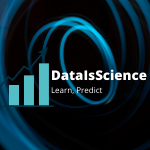

# Hypothesis Testing

# Background
The flights dataset is a record of all the flights that took place inside of the US for the year 2017. We will use the dataset to check the following hypotheses: 

1- A flight from  New York to California takes on average 5 hours (300 minutes).

2- Flights departing  from New York, NY travel on average the same  distance as flights departing from Albany, NY

We will use the 1 sample t-test to test the first assumption and the 2-sample t-test to test the second hypothesis.

# Step0: Import the Dataset

In [1]:
# import the libraries
import pandas as pd
import math
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# The flights dataset
flights = pd.read_csv("flights.csv", index_col=False).dropna()
flights.head(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2017,1,18,3,2017-01-18,19977,N426UA,RNO,"Reno, NV",Nevada,...,17.0,6.0,903,844.0,0.0,0.0,138.0,130.0,107.0,804.0
1,2017,1,19,4,2017-01-19,20366,N371CA,LGA,"New York, NY",New York,...,32.0,4.0,2242,2236.0,0.0,0.0,222.0,189.0,153.0,1107.0
2,2017,1,22,7,2017-01-22,19393,N7829B,BWI,"Baltimore, MD",Maryland,...,8.0,5.0,1230,1254.0,0.0,0.0,60.0,53.0,40.0,220.0
3,2017,1,12,4,2017-01-12,19790,N915AT,JFK,"New York, NY",New York,...,27.0,7.0,1135,1112.0,0.0,0.0,145.0,131.0,97.0,636.0
4,2017,1,30,1,2017-01-30,20409,N659JB,MCO,"Orlando, FL",Florida,...,14.0,3.0,1405,1354.0,0.0,0.0,159.0,154.0,137.0,1072.0


# Step1:  1-sample T-test

# Step 1.1: Data Visualization

Text(0.5, 1.0, 'ny_to_ca sample')

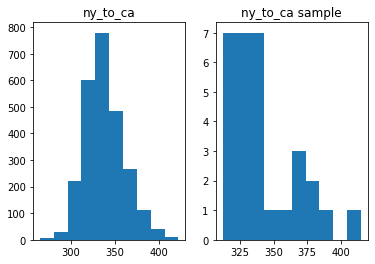

In [3]:
# H_0: mu = 300 The null hypothesis: flights from CA to NY lats on average 300 minutes
# H_a: mu > 300 The alternative hypothesis: fligts from CA to NY last longer than 300 minutes on average

#California to NewYork Airtime
ny_to_ca = flights[(flights['ORIGIN_STATE_NM'] == 'New York') & (flights['DEST_STATE_NM'] == 'California')]

#California to NewYork Airtime sample of 50
ny_to_ca_sample = ny_to_ca['AIR_TIME'].sample(30, random_state=18)

mu = 300
alpha = 0.05 # The upper threshold below wich we reject the null hypothesis

# let's look at the California to NewYork Airtime and California to NewYork Airtime sample of 50
fig,(ax1,ax2 )= plt.subplots(ncols=2)
ax1.hist(ny_to_ca['AIR_TIME'])
ax1.set_title("ny_to_ca")
ax2.hist(ny_to_ca_sample)
ax2.set_title("ny_to_ca sample")

The visualization shows that most flights from NY to CA have an Air Time greater than 5 hours (300 minutes).
Let's confirm this through hypothesis testing.

# Step 1.2: Determine p-value 

In [4]:
# compute mean, standard deviation, and degrees of freedom
sample_mean = np.mean(ny_to_ca_sample)
sample_std = np.std(ny_to_ca_sample, ddof=1)
n = len(ny_to_ca_sample)
dof = n - 1

# generate the corresponding t-distribution
t_dist = stats.t(dof)

# compute t-score
t = (sample_mean - mu) / (sample_std / math.sqrt(n))

# compute p-value
# here we use t_dist.sf because we want the upper range of the distribution since H_a: mu > 300
p_value = t_dist.sf(t)

print("The p-value  is:", p_value)


The p-value  is: 1.671077397255657e-10



The p-value is significantly smaller than alpha=0.05. Therefore, we can reject the null hypothesis. We can safely state that on average a flight from New York to California takes longer than 5 hours on average.

 # Step2:  2-sample T-test

# Step 2.1: Data Visualization

Text(0.5, 1.0, 'Albany_sample')

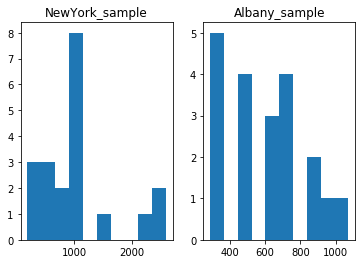

In [10]:
#The two airports we're considering is New York City, NY and Albany,NY

# H_0: mu1 - mu2 = 0  The null hypothesis: the average flight's distance for a plane departing from  New York, NY  is the same as the average flight's distance for a plane departing from Albany, NY

# H_a: mu1 > mu2    ->    mu1 - mu2 > 0  The alternative hypothesis: the average flight's distance for a plane departing from  New York, NY  is greater than the average flight's distance for a plane departing from Albany, NY

NewYork_flights = flights[flights['ORIGIN_CITY_NAME'] == 'New York, NY']
Albany_flights = flights[flights['ORIGIN_CITY_NAME'] == 'Albany, NY']

NewYork_sample = NewYork_flights['DISTANCE'].sample(20, random_state=17)
Albany_sample = Albany_flights['DISTANCE'].sample(20, random_state=17)

alpha = 0.05 # The upper threshold below wich we reject the null hypothesis

# let's look at the California to NewYork Airtime and California to NewYork Airtime sample of 50
fig,(ax1,ax2 )= plt.subplots(ncols=2)
ax1.hist(NewYork_sample)
ax1.set_title("NewYork_sample")
ax2.hist(Albany_sample)
ax2.set_title("Albany_sample")

The visualization seems to show that flights from New York, NY travel a longer distance on average than flights departing from Niagara Falls, NY. Let's confirm using the 2-sample t-test and the p-value.

# Step 2.2: Determine p-value 

In [11]:
# compute mean, standard deviation, and degrees of freedom
sample_mean1 = np.mean(NewYork_sample)
sample_mean2 = np.mean(Albany_sample)
sample_std1 = np.std(NewYork_sample, ddof=1)
sample_std2 = np.std(Albany_sample, ddof=1)
n1 = len(NewYork_sample)
n2 = len(Albany_sample)
dof = n1 + n2 - 2

# generate corresponding t-distribution
t_dist = stats.t(dof)

# compute pooled standard deviation
s_p = math.sqrt(((n1 - 1) * sample_std1 ** 2 + (n2 - 1) * sample_std2 ** 2) / dof)

# compute t-score
t_score = ( sample_mean1 -sample_mean2) / (s_p * math.sqrt(1. / n1 + 1. / n2))

# compute p-value
p_value  = t_dist.sf(t_score)

print("The p-value  is:", p_value)


The p-value  is: 0.0033106793575031165


## Step 2.2: Visualize  p-value 

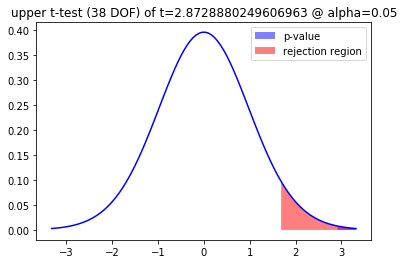

In [12]:
MIN_PPF = 0.001
MAX_PPF = 0.999

# construct the t-dist
t_dist = stats.t(dof)
x = np.linspace(t_dist.ppf(MIN_PPF), t_dist.ppf(MAX_PPF), 100)
y = t_dist.pdf(x)
plt.plot(x, y, 'b')

# show p-value

# plot p-value
plt.fill_between(x[x > t_score], 0, y[x > t_score], facecolor='b', alpha=0.5, label='p-value')

# plot rejection region
x_alpha = np.linspace(t_dist.ppf(1 - alpha), t_dist.ppf(MAX_PPF), 100)
y_alpha = t_dist.pdf(x_alpha)
plt.fill_between(x_alpha, 0, y_alpha, facecolor='r', alpha=0.5, label='rejection region')

plt.legend()
plt.title('{} t-test ({} DOF) of t={} @ alpha={}'.format("upper", dof, t_score, alpha))

plt.show()


The p-value is significantly smaller than alpha=0.05. Therefore, we can reject the null hypothesis. We can safely state that on average flights from New York, NY travel a longer distance than flights departing from Albany, NY.